# Part I - FordGo Bike  trip Exploration
## by Hamza Bouajila

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  



## Preliminary Wrangling


In [79]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [80]:
df = pd.read_csv('fordgobike-tripdata.csv')

In [81]:
df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
145082,584,2019-02-07 10:13:41.1390,2019-02-07 10:23:25.8820,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4965,Subscriber,1992.0,Male,No
169663,812,2019-02-04 09:26:18.4010,2019-02-04 09:39:50.8520,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,245.0,Downtown Berkeley BART,37.870139,-122.268422,5256,Subscriber,1965.0,Male,Yes
100735,1198,2019-02-14 17:54:37.7770,2019-02-14 18:14:36.1980,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,74.0,Laguna St at Hayes St,37.776435,-122.426244,4773,Subscriber,1970.0,Male,No
3197,367,2019-02-28 17:30:27.7500,2019-02-28 17:36:34.7960,88.0,11th St at Bryant St,37.770030,-122.411726,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,5799,Subscriber,1989.0,Female,No
115606,89,2019-02-12 08:40:18.5060,2019-02-12 08:41:48.1920,250.0,North Berkeley BART Station,37.873558,-122.283093,250.0,North Berkeley BART Station,37.873558,-122.283093,5214,Subscriber,1998.0,Female,Yes


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

### What is the structure of your dataset?

> The dataset contains 183412   rows and 16  columns

### What is/are the main feature(s) of interest in your dataset?

> in the fordgobike-tripdata dataset the main features are start_time , end_time , user_type and member gender 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> bike_share_for_all_trip ,member_birth_yearand duration_sec may be a help to support the investigation

### There are some missing  values  :

In [83]:
df = df.dropna()

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

### Correct the variables data types :

In [85]:
df.start_time = pd.to_datetime(df.start_time)

In [86]:
df.end_time = pd.to_datetime(df.end_time)

In [87]:
df = df.astype({"start_station_id" : int ,"end_station_id" : int,"member_birth_year" : int})

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  int32         
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  int32         
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [89]:
df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
172003,553,2019-02-03 17:46:01.426,2019-02-03 17:55:14.656,375,Grove St at Masonic Ave,37.774836,-122.446546,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,4706,Subscriber,1981,Male,No
123384,316,2019-02-11 09:30:29.593,2019-02-11 09:35:46.385,152,47th St at San Pablo Ave,37.835632,-122.281051,214,Market St at Brockhurst St,37.823321,-122.275733,4516,Subscriber,1976,Male,Yes
122643,312,2019-02-11 11:10:12.993,2019-02-11 11:15:25.541,25,Howard St at 2nd St,37.787522,-122.397405,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5162,Subscriber,1990,Male,No
167706,573,2019-02-04 16:55:17.557,2019-02-04 17:04:51.284,256,Hearst Ave at Euclid Ave,37.875112,-122.260553,262,West St at University Ave,37.869967,-122.286533,5263,Subscriber,1975,Male,No
7641,574,2019-02-28 08:53:22.727,2019-02-28 09:02:57.484,99,Folsom St at 15th St,37.767037,-122.415442,102,Irwin St at 8th St,37.766883,-122.399579,1201,Subscriber,1995,Female,No


In [90]:
df['start_hour'] = df.start_time.dt.hour

In [91]:
df['end_hour'] = df.end_time.dt.hour

In [92]:
df['start_day'] = df.start_time.dt.day
df['end_day'] = df.end_time.dt.day

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


> ### 1- is there any outliers in duration_sec column ? :


[Text(0.5, 1.0, 'Trip Duration per Second Distribution'),
 Text(0, 0.5, 'Duration (Seconds)')]

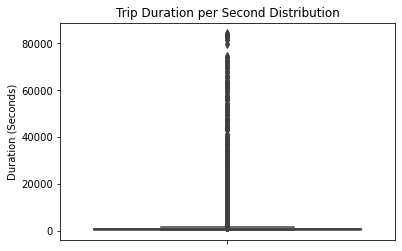

In [156]:
sb.boxplot(y="duration_sec",data = df).set(title ='Trip Duration per Second Distribution' , ylabel= 'Duration (Seconds)')

In [94]:
df.duration_sec.describe()

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

Mean = 704 and max = 84548 there are outliers weneed to take care of

In [95]:
df1 = df.query('duration_sec <= 1.5*789')

[Text(0.5, 1.0, 'Trip Duration per Second Distribution Corrected'),
 Text(0, 0.5, 'Duration (Seconds)')]

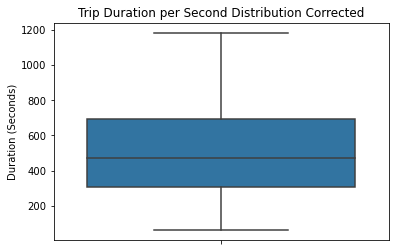

In [159]:
sb.boxplot(y="duration_sec",data = df1).set(title ='Trip Duration per Second Distribution Corrected' , ylabel= 'Duration (Seconds)')

> ###  2- Check skewness of Member birth years variable 


[Text(0.5, 1.0, 'Memebr Birth Year Distribution')]

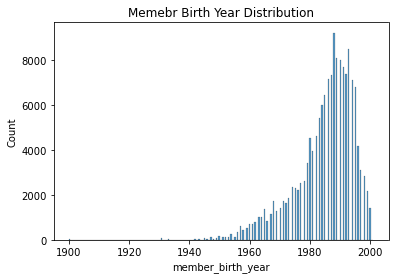

In [158]:
sb.histplot(x= 'member_birth_year',data = df1).set(title ='Memebr Birth Year Distribution')

member birth year is skewed to the left wich means we have some outliers

<AxesSubplot:ylabel='member_birth_year'>

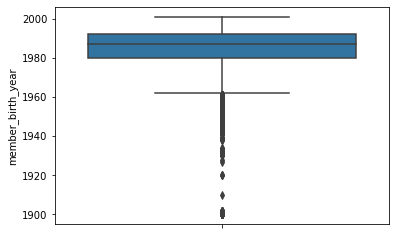

In [98]:
sb.boxplot(y= 'member_birth_year',data = df1)

In [99]:
df1.member_birth_year.describe()

count    158282.000000
mean       1984.874458
std           9.995867
min        1900.000000
25%        1980.000000
50%        1987.000000
75%        1992.000000
max        2001.000000
Name: member_birth_year, dtype: float64

The outliers are from 1880 to 1960

In [100]:
df2 = df1.query('member_birth_year >= 1967')

[Text(0.5, 1.0, 'Memebr Birth Year Distribution Corrected')]

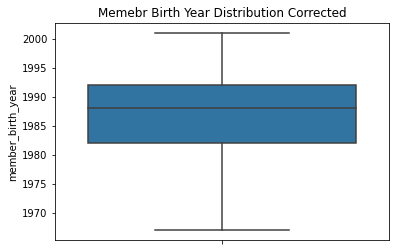

In [160]:
sb.boxplot(y= 'member_birth_year',data = df2).set(title ='Memebr Birth Year Distribution Corrected')

> ###  3- Destribution of user_type variable ?


[Text(0.5, 1.0, 'Number of Users Per Type'),
 Text(0.5, 0, 'User Type'),
 Text(0, 0.5, 'Number')]

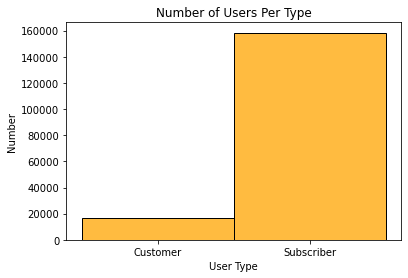

In [161]:
sb.histplot(x= 'user_type',data = df , color = 'orange').set(title ='Number of Users Per Type' ,xlabel = 'User Type', ylabel= 'Number')

>> Subsribers in data set are more than Customers

> ###  4- Destribution of member_gender variable ?


[Text(0.5, 1.0, 'Number of Members Per Gender'),
 Text(0.5, 0, 'Member Gender'),
 Text(0, 0.5, 'Number')]

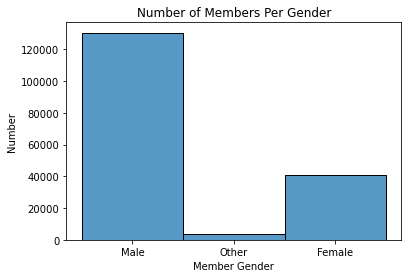

In [181]:
sb.histplot(x = 'member_gender',data = df ).set(title ='Number of Members Per Gender' ,xlabel='Member Gender', ylabel= 'Number')

>> Male members are more than the females , there are some other genders

> ### 5 -  Destribution of bike_share_for_all_trip	variable ?

<AxesSubplot:xlabel='bike_share_for_all_trip', ylabel='Count'>

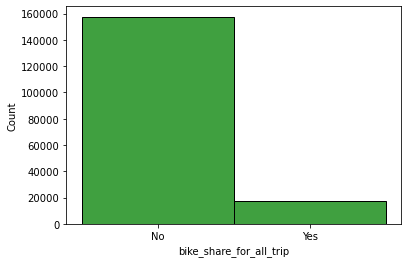

In [104]:
sb.histplot(x= 'bike_share_for_all_trip',data = df , color = 'green');

> Most of the users do not share their bike for all the trip there is a difference of 140000 approximately

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> In duration_sec variable we can see that most of the variables are between 61and 800 there are some ouliers where there are much higher than the majority of the variables . Added to that , in the member_birth_year variable are are born after 1960 , before that we have some outliers . We can see also that the distribution of multiple variables such as member_gender prove that Male members are much more than females and other gender , meanwhile the user_type variable distribution prove that customer are much less than the subscribers.Finallly we can see that the majority have not a bike share for all trip

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> there were some unusual distributions like left skewness in the duration_sec variable and outliers in the membre age variable so i took only the normal data without the outliers . Because the outliers will affect the visualations and will affect the results  

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [105]:
df2.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_hour,end_hour,start_day,end_day
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300,Palm St at Willow St,37.317298,-121.884995,312,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983,Female,No,23,0,28,1
9,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,19,Post St at Kearny St,37.788975,-122.403452,121,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992,Male,No,23,0,28,1
10,458,2019-02-28 23:57:57.211,2019-03-01 00:05:35.435,370,Jones St at Post St,37.787327,-122.413278,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,5318,Subscriber,1996,Female,Yes,23,0,28,1
11,506,2019-02-28 23:56:55.540,2019-03-01 00:05:21.733,44,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,343,Bryant St at 2nd St,37.783172,-122.393572,5848,Subscriber,1993,Male,No,23,0,28,1
12,1176,2019-02-28 23:45:12.651,2019-03-01 00:04:49.184,127,Valencia St at 21st St,37.756708,-122.421025,323,Broadway at Kearny,37.798014,-122.405950,5328,Customer,1990,Male,No,23,0,28,1


In [113]:
df2.bike_share_for_all_trip.replace(['No','Yes'] ,[0,1] , inplace = True)

In [108]:
df2['duration_minute']  = df2.duration_sec / 60

In [ ]:
df2.drop(['duration_sec'],axis = 1 , inplace  = True)

In [133]:
def drop(df , col = [] , ax = 1) :
    df.drop(['{}'.format(i) for i in col],axis = ax , inplace  = True)


In [182]:
df2.head(3)

,start_time,end_time,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_minute,age
6,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,Palm St at Willow St,37.317298,-121.884995,San Jose Diridon Station,37.329732,-121.901782,Subscriber,1983,Female,0,19.116667,39
9,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,Post St at Kearny St,37.788975,-122.403452,Mission Playground,37.759210,-122.421339,Subscriber,1992,Male,0,17.483333,30
10,2019-02-28 23:57:57.211,2019-03-01 00:05:35.435,Jones St at Post St,37.787327,-122.413278,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,Subscriber,1996,Female,1,7.633333,26


In [130]:
drop(df2,'end_day')

In [131]:
drop(df2,'start_day')

In [134]:
drop(df2,['end_hour','start_hour'])

In [135]:
df2.head(2)

,start_time,end_time,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_minute
6,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,Palm St at Willow St,37.317298,-121.884995,San Jose Diridon Station,37.329732,-121.901782,Subscriber,1983,Female,0,19.116667
9,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,Post St at Kearny St,37.788975,-122.403452,Mission Playground,37.759210,-122.421339,Subscriber,1992,Male,0,17.483333


In [137]:
df2['age'] = [2022- i for i in df2.member_birth_year]


In [139]:
df2.head(2)

,start_time,end_time,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_minute,age
6,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,Palm St at Willow St,37.317298,-121.884995,San Jose Diridon Station,37.329732,-121.901782,Subscriber,1983,Female,0,19.116667,39
9,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,Post St at Kearny St,37.788975,-122.403452,Mission Playground,37.759210,-122.421339,Subscriber,1992,Male,0,17.483333,30


<AxesSubplot:title={'center':'Start Station Location'}, xlabel='Laltitude', ylabel='Longitude'>

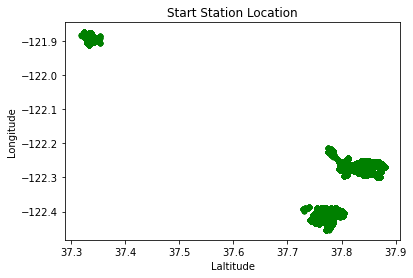

In [115]:
df2.plot('start_station_latitude','start_station_longitude', xlabel = 'Laltitude',ylabel = 'Longitude' , title = 'Start Station Location', kind = 'scatter' , c= 'green')

<AxesSubplot:title={'center':'End Station Location'}, xlabel='Laltitude', ylabel='Longitude'>

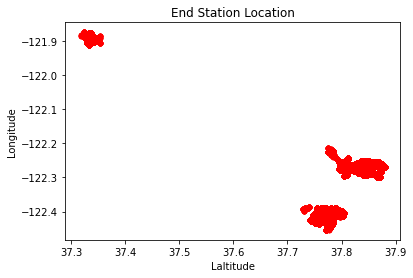

In [116]:
df2.plot('end_station_latitude','end_station_longitude', xlabel = 'Laltitude',ylabel = 'Longitude' , title = 'End Station Location', kind = 'scatter' , c= 'red')

##### We can conclude that there are three main regions that contain the trip course

In [117]:
df_user = df2.copy()

In [118]:
df_user = df_user.groupby('user_type').mean()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='user_type', ylabel='duration_minute'>

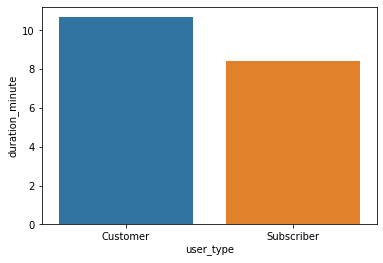

In [119]:
sb.barplot(df_user.index,df_user.duration_minute);

#### There is a slight difference between duration of subscribers and customers

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Bike share per age'),
 Text(0.5, 0, 'Member Age'),
 Text(0, 0.5, 'Bike share for all Trip')]

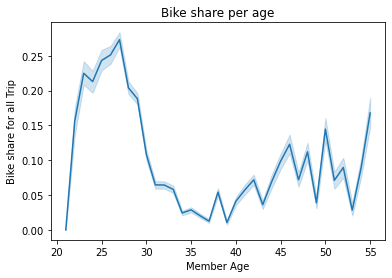

In [151]:
sb.lineplot(df2.age ,df2.bike_share_for_all_trip).set(title="Bike share per age" , xlabel = 'Member Age',ylabel = "Bike share for all Trip")

> The graph shows that young and aged people are more likely to share their bike more than the others

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> there is a relationship between longintutr and laltitude in the Sanfrancisco , where to start and end the bikesharing  trip , added to that ,depending on the usertype ,the duration differ , infact , customers more likely to have longer durations . finally ,depending on the ga eof members , bike share is different .

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> there were some interesting relationships between longitude and laltitude , in fact there are common caracteristics like we have 3 clusters

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [121]:
df_corr = df.corr()

In [122]:
df_corr.shape

(13, 13)

<AxesSubplot:>

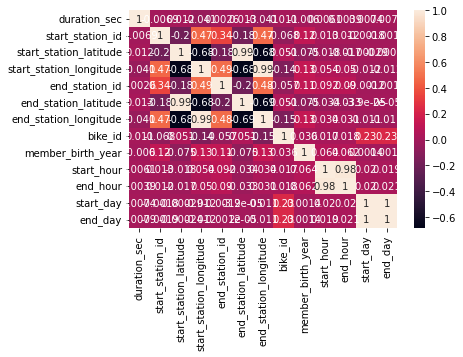

In [123]:
sb.heatmap(df_corr , annot = True )


> The graph shows us that there is a strong correlation between start and end hours , between start station longitude and start station laltitude ,between end station longitude and end station laltitudewhere the otheres have a weak correlation  

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='user_type', ylabel='bike_share_for_all_trip'>

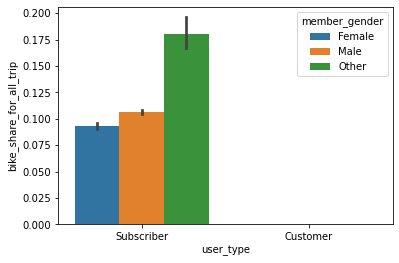

In [124]:
sb.barplot(df2.user_type ,df2.bike_share_for_all_trip , hue = df2.member_gender );

> As we can see , Only subscribers are sharing their bikes where customers not but unexpectedly , other genders are more likely to share their bike more than the male or females despite their small number 

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Trip Duration per Age For each gender'),
 Text(0.5, 0, 'Member Age'),
 Text(0, 0.5, 'Duration(Minute)')]

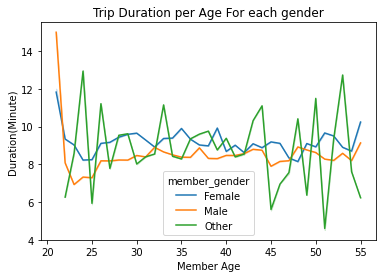

In [189]:
sb.lineplot(df2.age,df2.duration_minute , hue = df2.member_gender,ci = False).set(title ='Trip Duration per Age For each gender' ,xlabel ='Member Age' ,ylabel= 'Duration(Minute)')

> we Can see that other gender has no regumar distribution , however ,for the young Males and Females , they tend to have much long duration than the older ages

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='member_birth_year', ylabel='start_time'>

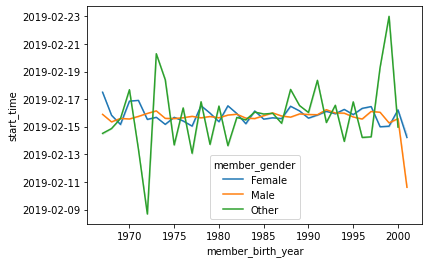

In [126]:
sb.lineplot(df2.member_birth_year,df2.start_time , hue = df2.member_gender,ci = False);

> the Graph shows that old people have the trip in the middle of the second month except for the young people they do the trip in the beginning of the month however we can not conclude anythong for the other genders 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> there were the user type feature made that only subsciriber have share bike for all trip , in the other hand ,there were three main areas in california that contain the trip , that was thanks to the relation ships between latitude and longitude of the start and end fetures , there were also the duration in minutes , were there is an augmentation of the duration in latest years for males and females

### Were there any interesting or surprising interactions between features?

> Cutomers do not share their bike , only subscribers share their bike however despite the number of other gender is less than males and females , they share bikes much more than the other genders

## Conclusions
> the bikeshare system , is depending on the age , gender infact duration and bike share for all trip are proportional to these variables



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

